--- Monte Carlo Simulation (10000 paths over 1.0 year) ---
Initial Price (S0): $100.00
Annual Return (mu): 8.0%
Annual Volatility (sigma): 25.0%

--- Simulation Summary ---
Expected (Mean) Final Price: $108.30
Median Final Price: $105.25
Standard Deviation: $27.16
95% Confidence Interval: [$64.14, $171.36]


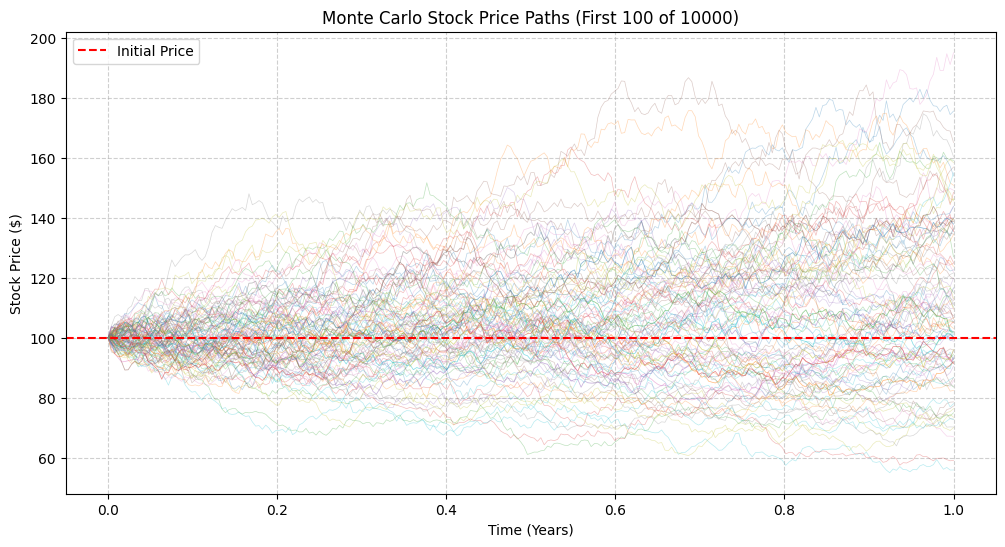

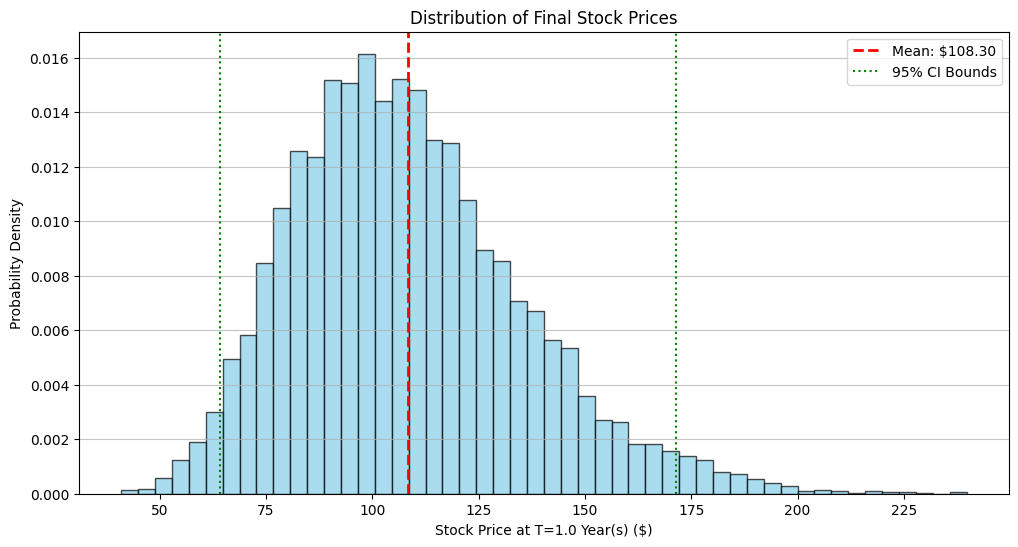


Probability of price exceeding $110.00: 43.02%


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_price_simulation(S0, mu, sigma, T, N_simulations, N_steps):
    """
    Estimates the future price of a stock using Monte Carlo simulation based on
    Geometric Brownian Motion (GBM).

    Args:
        S0 (float): Current stock price.
        mu (float): Expected annual return (drift).
        sigma (float): Annual volatility.
        T (float): Total time in years (e.g., 1.0 for one year).
        N_simulations (int): Number of independent price paths to simulate.
        N_steps (int): Number of time steps in the simulation (affects granularity).

    Returns:
        tuple: (final_prices, price_paths)
            - final_prices (np.array): Array of final prices after time T.
            - price_paths (np.array): 2D array of all simulated price paths.
    """

    # Calculate the time increment for each step
    dt = T / N_steps

    # Calculate the drift component of the GBM equation
    # (mu - 0.5 * sigma^2) * dt
    drift = (mu - 0.5 * sigma**2) * dt

    # Calculate the diffusion component (volatility term)
    # sigma * sqrt(dt)
    volatility_term = sigma * np.sqrt(dt)

    # Array to hold the final price for each simulation
    final_prices = np.zeros(N_simulations)

    # Array to hold all price paths (N_simulations rows, N_steps+1 columns)
    price_paths = np.zeros((N_simulations, N_steps + 1))

    # Initialize all paths with the starting price S0
    price_paths[:, 0] = S0

    # Main Monte Carlo loop
    for i in range(N_simulations):
        # Array to store the prices for the current path
        prices = np.zeros(N_steps + 1)
        prices[0] = S0

        # Generate N_steps standard normal random variables (Z) for the path
        Z = np.random.standard_normal(N_steps)

        # Calculate price changes step-by-step
        for t in range(1, N_steps + 1):
            # GBM formula step: S_t = S_{t-1} * exp(drift + volatility_term * Z)
            prices[t] = prices[t-1] * np.exp(drift + volatility_term * Z[t-1])

        # Store the final price and the full path
        final_prices[i] = prices[-1]
        price_paths[i, :] = prices

    return final_prices, price_paths

# --- Example Usage ---
if __name__ == '__main__':
    # Define stock and simulation parameters
    S0 = 100.0          # Current stock price
    mu = 0.08           # Expected annual return (8%)
    sigma = 0.25        # Annual volatility (25%)
    T = 1.0             # Time horizon in years (1 year)
    N_simulations = 10000  # Number of simulated paths
    N_steps = 252       # Trading days in a year (daily steps)

    print(f"--- Monte Carlo Simulation ({N_simulations} paths over {T} year) ---")
    print(f"Initial Price (S0): ${S0:.2f}")
    print(f"Annual Return (mu): {mu*100:.1f}%")
    print(f"Annual Volatility (sigma): {sigma*100:.1f}%")

    # Run the simulation
    final_prices, price_paths = monte_carlo_price_simulation(S0, mu, sigma, T, N_simulations, N_steps)

    # --- Results Analysis ---
    mean_price = np.mean(final_prices)
    median_price = np.median(final_prices)
    std_dev = np.std(final_prices)

    # Find confidence interval (e.g., 95% confidence)
    confidence_interval = np.percentile(final_prices, [2.5, 97.5])

    print("\n--- Simulation Summary ---")
    print(f"Expected (Mean) Final Price: ${mean_price:.2f}")
    print(f"Median Final Price: ${median_price:.2f}")
    print(f"Standard Deviation: ${std_dev:.2f}")
    print(f"95% Confidence Interval: [${confidence_interval[0]:.2f}, ${confidence_interval[1]:.2f}]")

    # --- Plotting the Results ---

    # 1. Plot a few representative paths
    plt.figure(figsize=(12, 6))
    time_points = np.linspace(0, T, N_steps + 1)

    # Plot the first 100 paths for visualization clarity
    for i in range(min(100, N_simulations)):
        plt.plot(time_points, price_paths[i], lw=0.5, alpha=0.3)

    plt.plot(time_points, price_paths[:10].T, lw=0.5, alpha=0.3) # Plotting a subset
    plt.title(f'Monte Carlo Stock Price Paths (First 100 of {N_simulations})')
    plt.xlabel('Time (Years)')
    plt.ylabel('Stock Price ($)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axhline(S0, color='red', linestyle='--', label='Initial Price')
    plt.legend()
    plt.show()

    # 2. Plot the distribution of final prices
    plt.figure(figsize=(12, 6))
    plt.hist(final_prices, bins=50, color='skyblue', edgecolor='black', alpha=0.7, density=True)

    # Add key statistics to the plot
    plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: ${mean_price:.2f}')
    plt.axvline(confidence_interval[0], color='green', linestyle=':', linewidth=1.5, label='95% CI Bounds')
    plt.axvline(confidence_interval[1], color='green', linestyle=':', linewidth=1.5)

    plt.title('Distribution of Final Stock Prices')
    plt.xlabel(f'Stock Price at T={T} Year(s) ($)')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # 3. Probability of exceeding a target price
    target_price = 110.0
    prob_exceed = np.mean(final_prices >= target_price)
    print(f"\nProbability of price exceeding ${target_price:.2f}: {prob_exceed*100:.2f}%")